PROJECTILE MOTION WITH AIR RESISTANCE SIMULATION

1. THEORETICAL BACKGROUND
----------------------------------------

PROJECTILE MOTION WITHOUT AIR RESISTANCE (Ideal Case):
- Only gravity acts on the projectile
- Equations of motion:
  x(t) = v₀ᵪ × t
  y(t) = v₀ᵧ × t - ½gt²

PROJECTILE MOTION WITH AIR RESISTANCE (Real Case):
- Both gravity and air resistance act on the projectile
- Air resistance force: F_drag = ½ρv²CₐA (quadratic drag)
- Results in coupled differential equations


2. MATHEMATICAL MODEL DEVELOPMENT
----------------------------------------
Projectile Parameters:
  Mass: 1.0 kg
  Drag coefficient: 0.47
  Cross-sectional area: 0.05 m²
  Air density: 1.225 kg/m³
  Drag constant k: 0.014394 kg/m


3. NUMERICAL SIMULATION
----------------------------------------

4. SIMULATION SETUP
----------------------------------------
Simulation Parameters:
  Initial velocity: 50.0 m/s
  Launch angle: 45.0°
  Maximum simulation time: 12.0 s

Running simulation with air resistance...
Cal

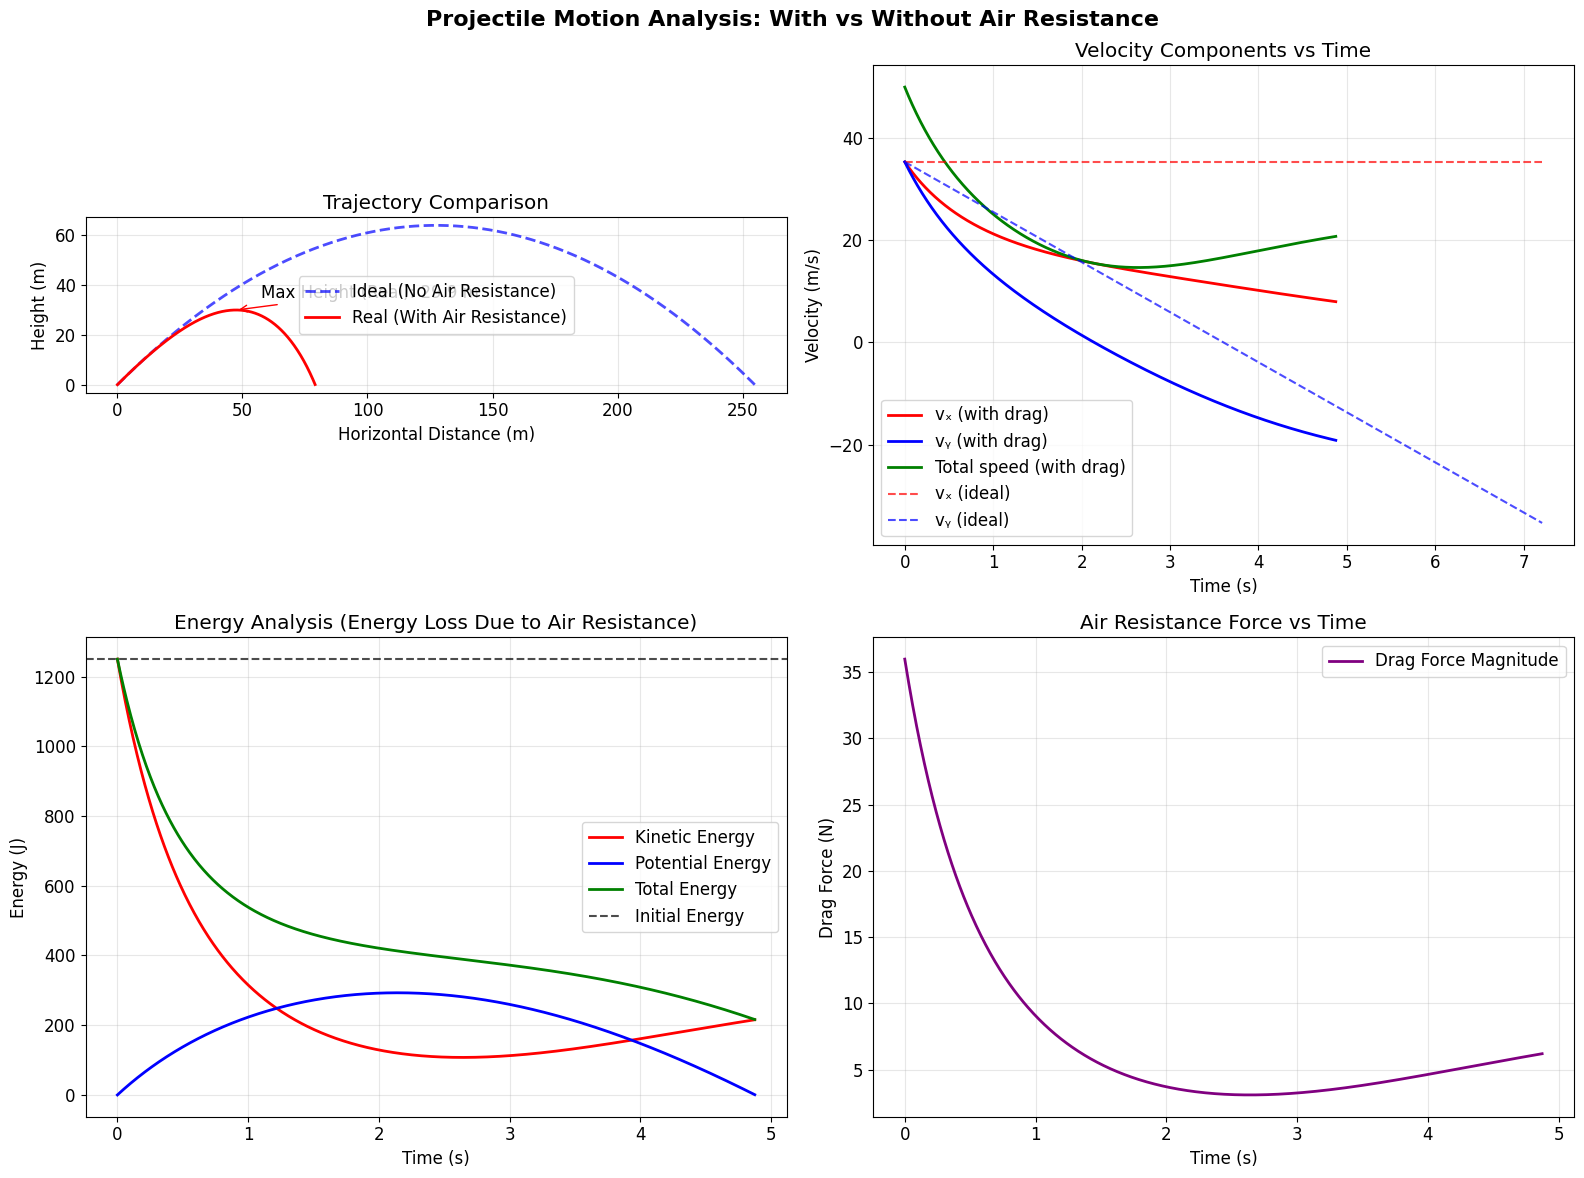



7. PARAMETER SENSITIVITY ANALYSIS
----------------------------------------
Analyzing how different parameters affect projectile motion...


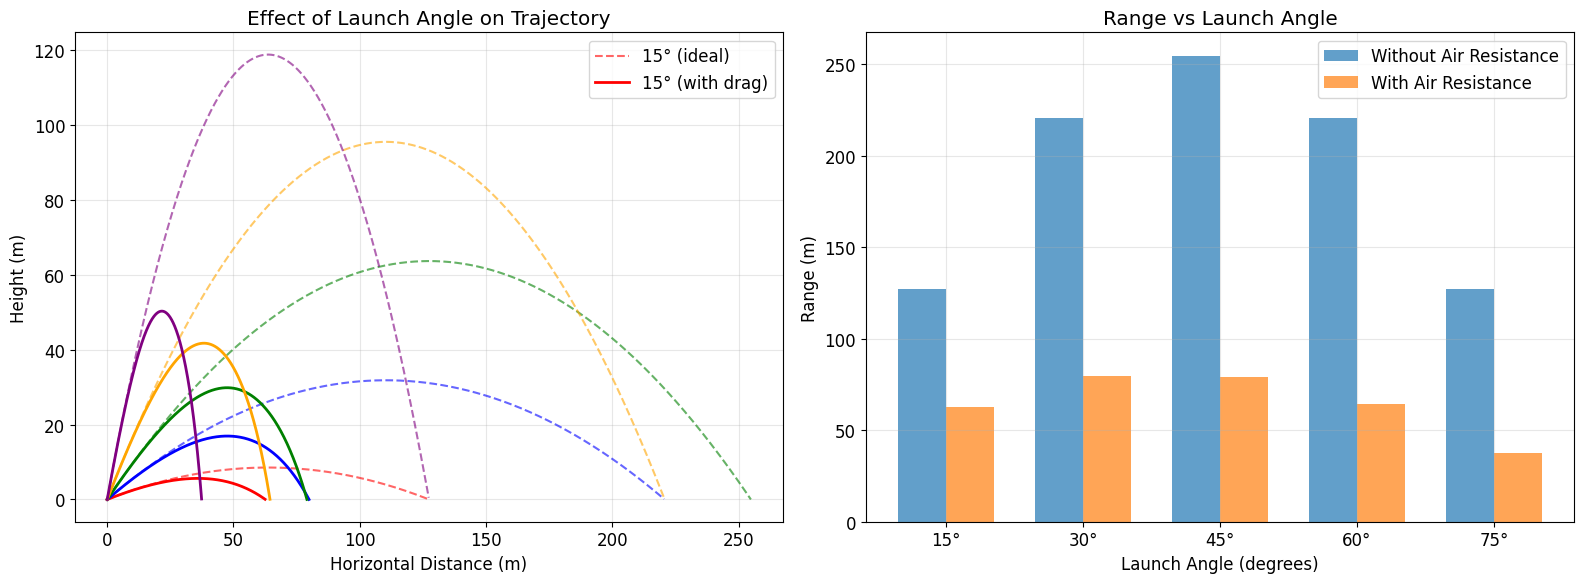


RANGE ANALYSIS BY LAUNCH ANGLE:
Angle (°)  Range w/o Drag (m) Range w/ Drag (m)  Reduction (%)  
-----------------------------------------------------------------
15         127.4              62.5               51.0           
30         220.5              79.9               63.8           
45         254.8              79.1               69.0           
60         220.7              64.4               70.8           
75         127.3              37.4               70.6           


8. ENGINEERING APPLICATIONS AND INSIGHTS
----------------------------------------

KEY ENGINEERING INSIGHTS:

1. AIR RESISTANCE EFFECTS:
   - Reduces maximum range significantly
   - Decreases flight time
   - Creates asymmetric trajectory (steeper descent)
   - Optimal launch angle < 45° (typically 35-40°)

2. ENERGY CONSIDERATIONS:
   - Kinetic energy continuously decreases due to drag
   - Total mechanical energy is not conserved
   - Energy loss rate depends on velocity squared

3. PRACTICAL APPLICAT

In [1]:
# Projectile Motion with Air Resistance
# Engineering Physics - Numerical Simulation

"""
ENGINEERING NOTEBOOK: PROJECTILE MOTION WITH AIR RESISTANCE

Learning Objectives:
1. Understand the physics of projectile motion with air resistance
2. Develop mathematical models using differential equations
3. Implement numerical solutions using Python
4. Compare theoretical vs. real-world projectile behavior
5. Analyze the effect of different parameters on trajectory

Prerequisites:
- Basic calculus and differential equations
- Newton's laws of motion
- Python programming basics
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd

# Set up plotting parameters for better visualization
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("="*60)
print("PROJECTILE MOTION WITH AIR RESISTANCE SIMULATION")
print("="*60)

# ============================================================================
# SECTION 1: THEORETICAL BACKGROUND
# ============================================================================

print("\n1. THEORETICAL BACKGROUND")
print("-" * 40)

print("""
PROJECTILE MOTION WITHOUT AIR RESISTANCE (Ideal Case):
- Only gravity acts on the projectile
- Equations of motion:
  x(t) = v₀ᵪ × t
  y(t) = v₀ᵧ × t - ½gt²
  
PROJECTILE MOTION WITH AIR RESISTANCE (Real Case):
- Both gravity and air resistance act on the projectile
- Air resistance force: F_drag = ½ρv²CₐA (quadratic drag)
- Results in coupled differential equations
""")

# ============================================================================
# SECTION 2: MATHEMATICAL MODEL DEVELOPMENT
# ============================================================================

print("\n2. MATHEMATICAL MODEL DEVELOPMENT")
print("-" * 40)

class ProjectileModel:
    """
    Mathematical model for projectile motion with air resistance
    
    Physics Equations:
    - Air resistance force: F_drag = ½ρv²CₐA
    - Drag coefficient depends on object shape and Reynolds number
    - Newton's second law: F_net = ma
    """
    
    def __init__(self, mass=1.0, drag_coefficient=0.47, cross_sectional_area=0.05, 
                 air_density=1.225, gravity=9.81):
        """
        Initialize projectile parameters
        
        Parameters:
        mass (kg): Mass of projectile
        drag_coefficient: Dimensionless drag coefficient (sphere ≈ 0.47)
        cross_sectional_area (m²): Cross-sectional area
        air_density (kg/m³): Air density at sea level
        gravity (m/s²): Gravitational acceleration
        """
        self.m = mass
        self.Cd = drag_coefficient
        self.A = cross_sectional_area
        self.rho = air_density
        self.g = gravity
        
        # Calculate drag constant
        self.k = 0.5 * self.rho * self.Cd * self.A
        
        print(f"Projectile Parameters:")
        print(f"  Mass: {self.m} kg")
        print(f"  Drag coefficient: {self.Cd}")
        print(f"  Cross-sectional area: {self.A} m²")
        print(f"  Air density: {self.rho} kg/m³")
        print(f"  Drag constant k: {self.k:.6f} kg/m")
    
    def equations_of_motion(self, state, t):
        """
        Differential equations for projectile motion with air resistance
        
        State vector: [x, y, vx, vy]
        
        Equations:
        dx/dt = vx
        dy/dt = vy
        dvx/dt = -(k/m) * v * vx  (air resistance in x-direction)
        dvy/dt = -g - (k/m) * v * vy  (gravity + air resistance in y-direction)
        
        where v = sqrt(vx² + vy²) is the speed
        """
        x, y, vx, vy = state
        
        # Calculate speed
        v = np.sqrt(vx**2 + vy**2)
        
        # Avoid division by zero
        if v == 0:
            drag_x = 0
            drag_y = 0
        else:
            drag_x = -(self.k / self.m) * v * vx
            drag_y = -(self.k / self.m) * v * vy
        
        # Differential equations
        dxdt = vx
        dydt = vy
        dvxdt = drag_x
        dvydt = -self.g + drag_y
        
        return [dxdt, dydt, dvxdt, dvydt]
    
    def ideal_trajectory(self, v0, angle, t_max):
        """
        Analytical solution for projectile motion WITHOUT air resistance
        """
        angle_rad = np.radians(angle)
        v0x = v0 * np.cos(angle_rad)
        v0y = v0 * np.sin(angle_rad)
        
        # Time of flight for ideal case
        t_flight_ideal = 2 * v0y / self.g
        t = np.linspace(0, min(t_max, t_flight_ideal), 1000)
        
        x_ideal = v0x * t
        y_ideal = v0y * t - 0.5 * self.g * t**2
        
        # Only keep points where y >= 0
        valid_indices = y_ideal >= 0
        
        return t[valid_indices], x_ideal[valid_indices], y_ideal[valid_indices]

# Create projectile model instance
projectile = ProjectileModel()

# ============================================================================
# SECTION 3: NUMERICAL SIMULATION
# ============================================================================

print("\n\n3. NUMERICAL SIMULATION")
print("-" * 40)

def simulate_projectile(projectile_model, initial_velocity, launch_angle, simulation_time=10):
    """
    Simulate projectile motion with air resistance using numerical integration
    
    Parameters:
    projectile_model: ProjectileModel instance
    initial_velocity (m/s): Initial velocity magnitude
    launch_angle (degrees): Launch angle from horizontal
    simulation_time (s): Maximum simulation time
    
    Returns:
    t, x, y, vx, vy: Arrays of time, position, and velocity data
    """
    
    # Convert angle to radians and calculate initial velocity components
    angle_rad = np.radians(launch_angle)
    v0x = initial_velocity * np.cos(angle_rad)
    v0y = initial_velocity * np.sin(angle_rad)
    
    # Initial state: [x0, y0, vx0, vy0]
    initial_state = [0.0, 0.0, v0x, v0y]
    
    # Time array
    t = np.linspace(0, simulation_time, 2000)
    
    # Solve differential equations
    solution = odeint(projectile_model.equations_of_motion, initial_state, t)
    
    x = solution[:, 0]
    y = solution[:, 1]
    vx = solution[:, 2]
    vy = solution[:, 3]
    
    # Find where projectile hits ground (y = 0)
    ground_indices = np.where(y >= 0)[0]
    if len(ground_indices) > 0:
        last_valid_index = ground_indices[-1]
        t = t[:last_valid_index+1]
        x = x[:last_valid_index+1]
        y = y[:last_valid_index+1]
        vx = vx[:last_valid_index+1]
        vy = vy[:last_valid_index+1]
    
    return t, x, y, vx, vy

# ============================================================================
# SECTION 4: SIMULATION PARAMETERS AND EXECUTION
# ============================================================================

print("\n4. SIMULATION SETUP")
print("-" * 40)

# Simulation parameters
initial_velocity = 50.0  # m/s
launch_angle = 45.0      # degrees
simulation_time = 12.0   # seconds

print(f"Simulation Parameters:")
print(f"  Initial velocity: {initial_velocity} m/s")
print(f"  Launch angle: {launch_angle}°")
print(f"  Maximum simulation time: {simulation_time} s")

# Run simulation with air resistance
print("\nRunning simulation with air resistance...")
t_real, x_real, y_real, vx_real, vy_real = simulate_projectile(
    projectile, initial_velocity, launch_angle, simulation_time
)

# Calculate ideal trajectory (no air resistance)
print("Calculating ideal trajectory (no air resistance)...")
t_ideal, x_ideal, y_ideal = projectile.ideal_trajectory(
    initial_velocity, launch_angle, simulation_time
)

print(f"\nSimulation completed!")
print(f"  Real trajectory points: {len(t_real)}")
print(f"  Ideal trajectory points: {len(t_ideal)}")

# ============================================================================
# SECTION 5: RESULTS ANALYSIS AND VISUALIZATION
# ============================================================================

print("\n\n5. RESULTS ANALYSIS")
print("-" * 40)

# Calculate key metrics
max_height_real = np.max(y_real)
max_range_real = np.max(x_real)
flight_time_real = t_real[-1]

max_height_ideal = np.max(y_ideal)
max_range_ideal = np.max(x_ideal)
flight_time_ideal = t_ideal[-1]

print("TRAJECTORY COMPARISON:")
print(f"{'Metric':<20} {'With Air Resistance':<20} {'Without Air Resistance':<20} {'Difference (%)':<15}")
print("-" * 80)
print(f"{'Max Height (m)':<20} {max_height_real:<20.2f} {max_height_ideal:<20.2f} {((max_height_real-max_height_ideal)/max_height_ideal*100):<15.1f}")
print(f"{'Max Range (m)':<20} {max_range_real:<20.2f} {max_range_ideal:<20.2f} {((max_range_real-max_range_ideal)/max_range_ideal*100):<15.1f}")
print(f"{'Flight Time (s)':<20} {flight_time_real:<20.2f} {flight_time_ideal:<20.2f} {((flight_time_real-flight_time_ideal)/flight_time_ideal*100):<15.1f}")

# ============================================================================
# SECTION 6: COMPREHENSIVE VISUALIZATION
# ============================================================================

print("\n\n6. VISUALIZATION")
print("-" * 40)

# Create comprehensive plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Projectile Motion Analysis: With vs Without Air Resistance', fontsize=16, fontweight='bold')

# Plot 1: Trajectory Comparison
ax1.plot(x_ideal, y_ideal, 'b--', linewidth=2, label='Ideal (No Air Resistance)', alpha=0.7)
ax1.plot(x_real, y_real, 'r-', linewidth=2, label='Real (With Air Resistance)')
ax1.set_xlabel('Horizontal Distance (m)')
ax1.set_ylabel('Height (m)')
ax1.set_title('Trajectory Comparison')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_aspect('equal')

# Add annotations for key points
ax1.annotate(f'Max Height (Real): {max_height_real:.1f} m', 
             xy=(x_real[np.argmax(y_real)], max_height_real), 
             xytext=(x_real[np.argmax(y_real)]+10, max_height_real+5),
             arrowprops=dict(arrowstyle='->', color='red'))

# Plot 2: Velocity Components vs Time
speed_real = np.sqrt(vx_real**2 + vy_real**2)
ax2.plot(t_real, vx_real, 'r-', label='vₓ (with drag)', linewidth=2)
ax2.plot(t_real, vy_real, 'b-', label='vᵧ (with drag)', linewidth=2)
ax2.plot(t_real, speed_real, 'g-', label='Total speed (with drag)', linewidth=2)

# Add ideal velocity components for comparison
v0x_ideal = initial_velocity * np.cos(np.radians(launch_angle))
v0y_ideal = initial_velocity * np.sin(np.radians(launch_angle))
vx_ideal_t = np.full_like(t_ideal, v0x_ideal)
vy_ideal_t = v0y_ideal - projectile.g * t_ideal
ax2.plot(t_ideal, vx_ideal_t, 'r--', alpha=0.7, label='vₓ (ideal)')
ax2.plot(t_ideal, vy_ideal_t, 'b--', alpha=0.7, label='vᵧ (ideal)')

ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Velocity (m/s)')
ax2.set_title('Velocity Components vs Time')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: Energy Analysis
kinetic_energy = 0.5 * projectile.m * (vx_real**2 + vy_real**2)
potential_energy = projectile.m * projectile.g * y_real
total_energy = kinetic_energy + potential_energy

ax3.plot(t_real, kinetic_energy, 'r-', label='Kinetic Energy', linewidth=2)
ax3.plot(t_real, potential_energy, 'b-', label='Potential Energy', linewidth=2)
ax3.plot(t_real, total_energy, 'g-', label='Total Energy', linewidth=2)

# Initial total energy (ideal case)
initial_energy = 0.5 * projectile.m * initial_velocity**2
ax3.axhline(y=initial_energy, color='k', linestyle='--', alpha=0.7, label='Initial Energy')

ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Energy (J)')
ax3.set_title('Energy Analysis (Energy Loss Due to Air Resistance)')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Drag Force Analysis
drag_force_magnitude = projectile.k * (vx_real**2 + vy_real**2)
ax4.plot(t_real, drag_force_magnitude, 'purple', linewidth=2, label='Drag Force Magnitude')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Drag Force (N)')
ax4.set_title('Air Resistance Force vs Time')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

# ============================================================================
# SECTION 7: PARAMETER SENSITIVITY ANALYSIS
# ============================================================================

print("\n\n7. PARAMETER SENSITIVITY ANALYSIS")
print("-" * 40)

print("Analyzing how different parameters affect projectile motion...")

# Function to run multiple simulations
def parameter_study():
    """Study the effect of different parameters on projectile motion"""
    
    # Different launch angles
    angles = [15, 30, 45, 60, 75]
    ranges_with_drag = []
    ranges_without_drag = []
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    
    for i, angle in enumerate(angles):
        # With air resistance
        t_drag, x_drag, y_drag, _, _ = simulate_projectile(projectile, initial_velocity, angle, 15)
        
        # Without air resistance (ideal)
        t_ideal, x_ideal, y_ideal = projectile.ideal_trajectory(initial_velocity, angle, 15)
        
        ranges_with_drag.append(np.max(x_drag))
        ranges_without_drag.append(np.max(x_ideal))
        
        # Plot trajectories
        ax1.plot(x_ideal, y_ideal, '--', color=colors[i], alpha=0.6, 
                label=f'{angle}° (ideal)' if i == 0 else "")
        ax1.plot(x_drag, y_drag, '-', color=colors[i], linewidth=2,
                label=f'{angle}° (with drag)' if i == 0 else "")
    
    ax1.set_xlabel('Horizontal Distance (m)')
    ax1.set_ylabel('Height (m)')
    ax1.set_title('Effect of Launch Angle on Trajectory')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Range comparison
    x_pos = np.arange(len(angles))
    width = 0.35
    
    ax2.bar(x_pos - width/2, ranges_without_drag, width, label='Without Air Resistance', alpha=0.7)
    ax2.bar(x_pos + width/2, ranges_with_drag, width, label='With Air Resistance', alpha=0.7)
    
    ax2.set_xlabel('Launch Angle (degrees)')
    ax2.set_ylabel('Range (m)')
    ax2.set_title('Range vs Launch Angle')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels([f'{angle}°' for angle in angles])
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print results table
    print("\nRANGE ANALYSIS BY LAUNCH ANGLE:")
    print(f"{'Angle (°)':<10} {'Range w/o Drag (m)':<18} {'Range w/ Drag (m)':<18} {'Reduction (%)':<15}")
    print("-" * 65)
    for i, angle in enumerate(angles):
        reduction = (ranges_without_drag[i] - ranges_with_drag[i]) / ranges_without_drag[i] * 100
        print(f"{angle:<10} {ranges_without_drag[i]:<18.1f} {ranges_with_drag[i]:<18.1f} {reduction:<15.1f}")

# Run parameter study
parameter_study()

# ============================================================================
# SECTION 8: ENGINEERING APPLICATIONS AND INSIGHTS
# ============================================================================

print("\n\n8. ENGINEERING APPLICATIONS AND INSIGHTS")
print("-" * 40)

print("""
KEY ENGINEERING INSIGHTS:

1. AIR RESISTANCE EFFECTS:
   - Reduces maximum range significantly
   - Decreases flight time
   - Creates asymmetric trajectory (steeper descent)
   - Optimal launch angle < 45° (typically 35-40°)

2. ENERGY CONSIDERATIONS:
   - Kinetic energy continuously decreases due to drag
   - Total mechanical energy is not conserved
   - Energy loss rate depends on velocity squared

3. PRACTICAL APPLICATIONS:
   - Ballistics and projectile design
   - Sports physics (golf, basketball, baseball)
   - Aerospace engineering (missile trajectories)
   - Safety engineering (debris fall patterns)

4. MODELING LIMITATIONS:
   - Assumes constant air density
   - Neglects Magnus effect (spin)
   - Simplified drag model (quadratic only)
   - No wind effects considered

5. NUMERICAL METHODS:
   - ODE solvers provide accurate solutions
   - Time step selection affects accuracy
   - Validation against analytical solutions important
""")

# ============================================================================
# SECTION 9: STUDENT EXERCISES AND EXTENSIONS
# ============================================================================

print("\n\n9. SUGGESTED STUDENT EXERCISES")
print("-" * 40)

print("""
EXERCISE 1: Parameter Exploration
- Modify the drag coefficient and observe trajectory changes
- Compare different projectile shapes (sphere, cylinder, etc.)
- Investigate the effect of projectile mass

EXERCISE 2: Advanced Physics
- Add Magnus force for spinning projectiles
- Include altitude-dependent air density
- Model wind effects (constant or variable)

EXERCISE 3: Optimization Problems
- Find optimal launch angle for maximum range with air resistance
- Determine minimum initial velocity to reach a target
- Design projectile shape for maximum range

EXERCISE 4: Real-World Applications
- Model specific sports scenarios (basketball free throw, golf shot)
- Analyze artillery trajectory calculations
- Study meteor atmospheric entry

EXERCISE 5: Numerical Methods
- Compare different ODE solvers (Euler, Runge-Kutta, etc.)
- Study the effect of time step size on accuracy
- Implement adaptive step size methods
""")

print("\n" + "="*60)
print("SIMULATION COMPLETE - NOTEBOOK READY FOR STUDENT USE")
print("="*60)

# Save results to CSV for further analysis
results_df = pd.DataFrame({
    'Time_s': t_real,
    'X_Position_m': x_real,
    'Y_Position_m': y_real,
    'X_Velocity_ms': vx_real,
    'Y_Velocity_ms': vy_real,
    'Total_Speed_ms': np.sqrt(vx_real**2 + vy_real**2),
    'Kinetic_Energy_J': 0.5 * projectile.m * (vx_real**2 + vy_real**2),
    'Potential_Energy_J': projectile.m * projectile.g * y_real
})

print(f"\nSimulation data saved with {len(results_df)} data points")
print("Data columns:", list(results_df.columns))
print("\nFirst few data points:")
print(results_df.head())

print("\n🎯 The notebook is complete and ready for educational use!")
print("Students can modify parameters, run experiments, and explore the physics!")